# The code here is to combine weather data and trip data

In [1]:
from datetime import datetime, date, time
from pandas import DataFrame, read_csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from ggplot import *

In [2]:
# lambdas & functions
lambda_city = lambda x: station_data['city'].ix[x]

def convert_float(val):
    try:
        return float(val)
    except ValueError:
        return 0

# dictionary reference
seasons_dict = {
    1: 'Winter',2: 'Spring',3: 'Spring',4: 'Spring',
    5: 'Summer',6: 'Summer',7: 'Summer',8: 'Autumn',
    9: 'Autumn',10: 'Autumn',11: 'Winter',12: 'Winter'}

city_dict = {
    94107: 'San Francisco',
    94063: 'Redwood City',
    94301: 'Palo Alto', 
    94041: 'Mountain View', 
    95113: 'San Jose'}

# header reference
station_headers = ['station_id','station_name','lat','long',
                   'dock_count','city','install_date']

status_headers = ['station_id','bikes_free','docks_free','time']

trip_headers = ['trip_id','trip_time',
                'start_dt','start_station','start_id',
                'end_dt','end_station','end_id',
                'bike_num','user_type','ZIP']

weather_headers = ['date',
                   'max_temp','mean_temp','min_temp',
                   'max_dp','mean_dp','min_dp',
                   'max_hum','mean_hum','min_hum',
                   'max_sea','mean_sea','min_sea',
                   'max_vis','mean_vis','min_vis',
                   'max_wind','mean_wind','max_gust',
                   'rain_inches','cloud_cover','events',
                   'wind_dir_degrees','ZIP']

## Weather data

In [3]:
# read weather data
weather_data = pd.read_csv('weather_data_new.csv', parse_dates=['date'])
weather_data['season'] = weather_data['date'].dt.month.map(seasons_dict)
weather_data['city'] = weather_data['ZIP'].map(city_dict)
# scrubbed columns from weather_data
weather_data['rain_inches'] = weather_data['rain_inches'].map(convert_float)

In [4]:
import datetime

In [5]:
# split weather data to 2014 and 2015
weather_2015 = weather_data[weather_data['date'] >='2014-09-01']
weather_2014 = weather_data[weather_data['date'] <'2014-09-01']

# label the datasets by month
weather_2014['month'] = weather_2014['date'].dt.month
weather_2015['month'] = weather_2015['date'].dt.month


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
# create a new dataframe that contains only the info that I need (month, season, avg_tem)
weather_2014_for_me = weather_2014[['date', 'mean_temp','mean_wind','season', 'city','month']]
weather_2015_for_me = weather_2015[['date', 'mean_temp','mean_wind','season', 'city','month']]

## Trip data

In [9]:
# read trip data and split it for 2014 and 2015
trip_data = pd.read_csv('trip_data_new.csv', parse_dates = ['date'])
trip_data_2014 = trip_data[trip_data['date'] < '2014-09-01']
trip_data_2015 = trip_data[trip_data['date'] >= '2014-09-01']

In [10]:
# label the trip datasets by month
trip_data_2014['month'] = trip_data_2014['date'].dt.month
trip_data_2015['month'] = trip_data_2015['date'].dt.month
trip_data_2014['trip_time'] = trip_data_2014['trip_time'] / 60   # concert trip time unit to minute
trip_data_2015['trip_time'] = trip_data_2015['trip_time'] / 60  

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [11]:
# create a new dataframe that contains only the info that I need (month, season, trip time, user type, city)
trip_data_2014_for_me = trip_data_2014[['date', 'trip_time','user_type','start_city', 'month']]
trip_data_2015_for_me = trip_data_2015[['date', 'trip_time','user_type','start_city','month']]

## Weather and trip data together per city

### San Francisco 2014 and 2015

In [13]:
# sf weather and trip data
SF_weather_2014 = weather_2014_for_me[weather_2014_for_me['city']=='San Francisco']
SF_trip_data_2014 = trip_data_2014_for_me[trip_data_2014_for_me['start_city'] =='San Francisco']

SF_all_2014 = pd.merge(SF_trip_data_2014, SF_weather_2014,on='date')
SF_all_2014 = SF_all_2014.drop(['start_city', 'month_x'], axis=1)
SF_all_2014 = SF_all_2014.rename(columns={'month_y': 'month'})

In [14]:
# sf by user statistics
SF_all_2014.head()

,date,trip_time,user_type,mean_temp,mean_wind,season,city,month
0,2013-09-01,25.133333,Customer,66,13,Autumn,San Francisco,9
1,2013-09-01,4.566667,Subscriber,66,13,Autumn,San Francisco,9
2,2013-09-01,19.950000,Customer,66,13,Autumn,San Francisco,9
3,2013-09-01,25.183333,Customer,66,13,Autumn,San Francisco,9
4,2013-09-01,25.183333,Customer,66,13,Autumn,San Francisco,9


In [15]:
# function used to create frames for each month/season in 2014
def trip_count_to_frame(data, column, elem):
    temp = data[data[column] == elem].groupby('user_type')['date'].count()
    temp = temp.to_frame(name=elem).T
    return temp
# define sort_range
sort_range_month = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]  # sort_range for month
sort_range_season = ['Autumn','Winter','Spring','Summer']

In [16]:
# SF DATA PER MONTH
SF_0913_result = trip_count_to_frame(SF_all_2014, 'month', 9)
SF_1013_result = trip_count_to_frame(SF_all_2014, 'month', 10)
SF_1113_result = trip_count_to_frame(SF_all_2014, 'month', 11)
SF_1213_result = trip_count_to_frame(SF_all_2014, 'month', 12)
SF_0114_result = trip_count_to_frame(SF_all_2014, 'month', 1)
SF_0214_result = trip_count_to_frame(SF_all_2014, 'month', 2)
SF_0314_result = trip_count_to_frame(SF_all_2014, 'month', 3)
SF_0414_result = trip_count_to_frame(SF_all_2014, 'month', 4)
SF_0514_result = trip_count_to_frame(SF_all_2014, 'month', 5)
SF_0614_result = trip_count_to_frame(SF_all_2014, 'month', 6)
SF_0714_result = trip_count_to_frame(SF_all_2014, 'month', 7)
SF_0814_result = trip_count_to_frame(SF_all_2014, 'month', 8)
# concat all the above dataframes
SF_trip_count_month_2014_all = pd.concat([SF_0913_result,SF_1013_result,SF_1113_result,SF_1213_result,SF_0114_result,
                  SF_0214_result,SF_0314_result,SF_0514_result,SF_0614_result,SF_0714_result,
                  SF_0814_result])
SF_trip_count_month_2014_all['mean_temp'] = 'NaN'
#SF_trip_count_month_2014_all.plot(kind='bar')
SF_trip_count_month_2014_all

user_type,Customer,Subscriber,mean_temp
9,8590,14114,NaN
10,5493,20659,NaN
11,3965,18008,NaN
12,2909,15228,NaN
1,2955,19044,NaN
2,2165,14919,NaN
3,3451,18530,NaN
5,4338,20796,NaN
6,4126,22370,NaN
7,4476,23280,NaN


In [20]:
# add avg temp to table
def add_avg_temp_to_data(data, data_add,column_name, sort_range):
    for i in sort_range:
        avg_temp = data[data[column_name] == i]['mean_temp'].mean()
        data_add['mean_temp'].loc[i] = avg_temp        
    return data_add

SF_trip_count_month_2014_all = add_avg_temp_to_data(SF_all_2014, SF_trip_count_month_2014_all, 'month', sort_range_month)
SF_trip_count_month_2014_all

user_type,Customer,Subscriber,mean_temp
9,8590,14114,65.652132
10,5493,20659,61.320893
11,3965,18008,58.154144
12,2909,15228,49.496940
1,2955,19044,55.759489
2,2165,14919,55.032369
3,3451,18530,59.186024
5,4338,20796,67.149508
6,4126,22370,67.149508
7,4476,23280,67.149508


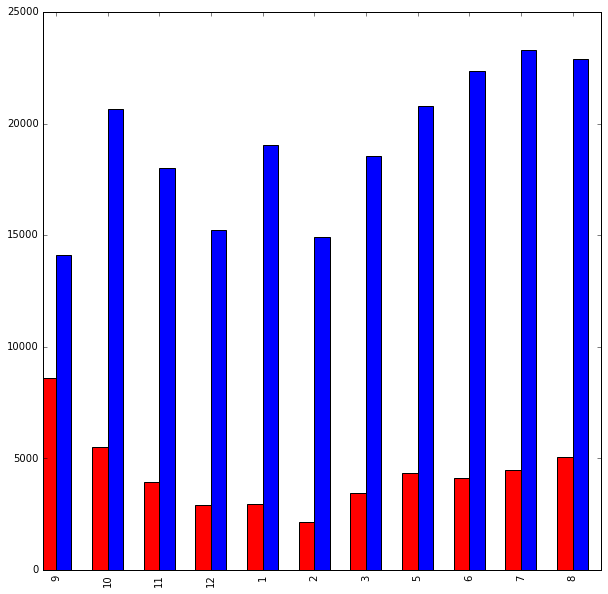

In [121]:
# plot SF 2014 trip count v. avg weather for 12 months in one plot
fig = plt.figure() # Create matplotlib figure

SF_trip_count_month_2014_all.Customer.plot(kind='bar', color='red',width=0.3, position=1, figsize=(10,10))
SF_trip_count_month_2014_all.Subscriber.plot(kind='bar', color='blue', width=0.3, position=0)

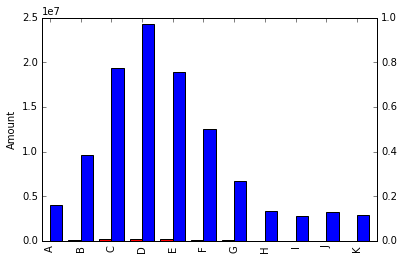

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
s = StringIO("""     amount     price
A     40929   4066443
B     93904   9611272
C    188349  19360005
D    248438  24335536
E    205622  18888604
F    140173  12580900
G     76243   6751731
H     36859   3418329
I     29304   2758928
J     39768   3201269
K     30350   2867059""")

df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

#width = 0.4

df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df.price.plot(kind='bar', color='blue', ax=ax, width=width, position=0
            )

ax.set_ylabel('Amount')
#ax2.set_ylabel('Price')

plt.show()